In [2]:
#pip install folium

In [3]:
import folium
import pandas as pd
import numpy

In [4]:
중구_위치=pd.read_csv("./중구 위치.csv",encoding='cp949')
중구_위치=중구_위치.drop(['Unnamed: 4'],1)
중구_위치

,대여소번호,대여소명,위도,경도
0,310,청계광장 옆,37.568878,126.977470
1,312,시청역 1번출구 뒤,37.564674,126.976738
2,318,광교사거리 남측,37.568527,126.982552
3,320,을지로입구역 4번출구 앞,37.566223,126.983589
4,321,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139
...,...,...,...,...
82,4793,동대문역사문화공원역 5번출구,37.564308,127.006477
83,4794,서울역 서부교차로(3),37.555408,126.969421
84,4796,부산은행,37.566471,126.979256
85,4797,KG타워 앞,37.563396,126.968941


In [5]:
ID=중구_위치['대여소번호']
중구_위도=중구_위치['위도']
중구_경도=중구_위치['경도']
위도=중구_위도.mean()
경도=중구_경도.mean()

In [6]:
m = folium.Map([위도, 경도], zoom_start = 13)

In [7]:
coords = []
for i in range(len(중구_위치)-1):
    x = 중구_위도[i]
    y = 중구_경도[i]
    coords.append([x, y])
    for i in range(len(coords)):
        folium.Circle(
        location = coords[i],
        radius = 13,
        color = 'red').add_to(m)

In [8]:
m

In [9]:
대여반납이력=pd.read_csv("./대여이력 데이터/공공자전거 대여이력 정보_2021.04.csv", encoding='cp949')

C:\Users\pione\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
대여반납이력=대여반납이력.drop(['자전거번호','대여 대여소명','대여거치대','반납대여소명','이용시간','이용거리','반납거치대'],1)

In [11]:
대여반납이력

,대여일시,대여 대여소번호,반납일시,반납대여소번호
0,2021-03-31 22:04:39,585,2021-04-01 00:00:01,03571
1,2021-03-31 23:47:26,2408,2021-04-01 00:00:03,02615
2,2021-03-31 23:38:54,1222,2021-04-01 00:00:04,02631
3,2021-03-31 23:58:28,1709,2021-04-01 00:00:06,01774
4,2021-03-31 23:47:27,2745,2021-04-01 00:00:06,02746
...,...,...,...,...
3027526,2021-04-30 23:57:21,1013,2021-04-30 23:59:56,01020
3027527,2021-04-30 22:41:41,2301,2021-04-30 23:59:56,02429
3027528,2021-04-30 23:33:45,3803,2021-04-30 23:59:57,03803
3027529,2021-04-30 23:23:18,2173,2021-04-30 23:59:58,02179


In [12]:
대여반납이력['반납대여소번호'] = 대여반납이력['반납대여소번호'].astype(str)
대여반납이력['대여 대여소번호'] = 대여반납이력['대여 대여소번호'].astype(str)

In [13]:
대여반납이력 = 대여반납이력[대여반납이력['반납대여소번호'].apply(lambda x: x.isnumeric())]
대여반납이력 = 대여반납이력[대여반납이력['대여 대여소번호'].apply(lambda x: x.isnumeric())]

In [14]:
대여반납이력['반납대여소번호'] = 대여반납이력['반납대여소번호'].astype('int')
대여반납이력['대여 대여소번호'] = 대여반납이력['대여 대여소번호'].astype('int')

# 구별대여소번호

In [15]:
구별대여소번호=pd.read_csv("./station_구별.csv", encoding='cp949')

In [16]:
구별대여소번호

,Unnamed: 0,대여소번호,소재지.위치.
0,5,102,마포구
1,6,103,마포구
2,7,104,마포구
3,8,105,마포구
4,9,106,마포구
...,...,...,...
2462,2467,4864,송파구
2463,2468,4865,송파구
2464,2469,4867,송파구
2465,2470,4868,송파구


In [17]:
구별대여소번호_중구=구별대여소번호[구별대여소번호['소재지.위치.']=='중구'];구별대여소번호_중구

,Unnamed: 0,대여소번호,소재지.위치.
178,183,300,중구
188,193,310,중구
189,194,312,중구
192,197,318,중구
193,198,320,중구
...,...,...,...
2435,2440,4792,중구
2436,2441,4793,중구
2437,2442,4794,중구
2438,2443,4796,중구


# 대여이력

In [18]:
대여이력=대여반납이력.drop(['반납대여소번호','반납일시'],1)

In [19]:
대여이력

,대여일시,대여 대여소번호
0,2021-03-31 22:04:39,585
1,2021-03-31 23:47:26,2408
2,2021-03-31 23:38:54,1222
3,2021-03-31 23:58:28,1709
4,2021-03-31 23:47:27,2745
...,...,...
3027526,2021-04-30 23:57:21,1013
3027527,2021-04-30 22:41:41,2301
3027528,2021-04-30 23:33:45,3803
3027529,2021-04-30 23:23:18,2173


In [20]:
대여이력=대여이력.rename(columns={'대여 대여소번호':'대여소번호'})
대여이력_자치구=대여이력.merge(구별대여소번호,on=['대여소번호'],how='inner')
대여이력_자치구=대여이력_자치구.rename(columns={'소재지.위치.':'자치구'})

# 대여이력_중구

In [21]:
대여이력_중구=대여이력_자치구[대여이력_자치구['자치구']=='중구']

In [22]:
대여이력_중구=대여이력_중구.drop(['Unnamed: 0'],1)

In [23]:
len(대여이력_중구['대여소번호'].unique())

83

In [24]:
대여이력_중구['대여일시']= pd.to_datetime(대여이력_중구['대여일시'])

In [25]:
대여이력_중구['대여일시_hour']=대여이력_중구['대여일시'].dt.hour
대여이력_중구['대여일시_date']=대여이력_중구['대여일시'].dt.date

In [26]:
대여이력_중구['대여일시_date']

101157     2021-03-31
101158     2021-04-01
101159     2021-04-01
101160     2021-04-01
101161     2021-04-01
              ...    
2989720    2021-04-30
2989721    2021-04-30
2989722    2021-04-30
2989723    2021-04-30
2989724    2021-04-30
Name: 대여일시_date, Length: 66705, dtype: object

In [27]:
대여이력_중구['대여일시_date']=대여이력_중구['대여일시_date'].astype(str)

In [28]:
대여이력_중구=대여이력_중구[대여이력_중구['대여일시_date']=='2021-04-24']

In [29]:
대여이력_중구

,대여일시,대여소번호,자치구,대여일시_hour,대여일시_date
101438,2021-04-24 09:15:48,4766,중구,9,2021-04-24
101439,2021-04-24 12:06:17,4766,중구,12,2021-04-24
101440,2021-04-24 14:36:59,4766,중구,14,2021-04-24
101441,2021-04-24 17:12:51,4766,중구,17,2021-04-24
101442,2021-04-24 17:10:45,4766,중구,17,2021-04-24
...,...,...,...,...,...
2989386,2021-04-24 20:30:25,381,중구,20,2021-04-24
2989662,2021-04-24 10:44:07,384,중구,10,2021-04-24
2989663,2021-04-24 12:37:47,384,중구,12,2021-04-24
2989664,2021-04-24 19:59:16,384,중구,19,2021-04-24


In [30]:
대여이력_중구=대여이력_중구[(대여이력_중구['대여일시_hour']>= 17) & (대여이력_중구['대여일시_hour'] < 22)]

In [31]:
len(대여이력_중구['대여소번호'].unique())

80

In [32]:
grouped = 대여이력_중구.groupby(['대여소번호','대여일시_date'])
grouped_대여=pd.DataFrame(grouped.count())
grouped_대여

,,대여일시,자치구,대여일시_hour
대여소번호,대여일시_date,,,
300,2021-04-24,8,8,8
310,2021-04-24,8,8,8
318,2021-04-24,3,3,3
320,2021-04-24,17,17,17
321,2021-04-24,23,23,23
...,...,...,...,...
4785,2021-04-24,2,2,2
4791,2021-04-24,14,14,14
4792,2021-04-24,17,17,17


In [33]:
grouped_대여=grouped_대여.drop(['자치구','대여일시_hour'],1)
grouped_대여=grouped_대여.rename(columns={'대여일시':'대여수'})

# 반납이력

In [34]:
반납이력=대여반납이력.drop(['대여 대여소번호','대여일시'],1)
반납이력

,반납일시,반납대여소번호
0,2021-04-01 00:00:01,3571
1,2021-04-01 00:00:03,2615
2,2021-04-01 00:00:04,2631
3,2021-04-01 00:00:06,1774
4,2021-04-01 00:00:06,2746
...,...,...
3027526,2021-04-30 23:59:56,1020
3027527,2021-04-30 23:59:56,2429
3027528,2021-04-30 23:59:57,3803
3027529,2021-04-30 23:59:58,2179


In [35]:
반납이력=반납이력.rename(columns={'반납대여소번호':'대여소번호'})
반납이력_자치구=반납이력.merge(구별대여소번호,on=['대여소번호'],how='inner')
반납이력_자치구=반납이력_자치구.rename(columns={'소재지.위치.':'자치구'})

In [36]:
반납이력_중구=반납이력_자치구[반납이력_자치구['자치구']=='중구']

In [37]:
반납이력_중구=반납이력_중구.drop(['Unnamed: 0'],1)

In [38]:
len(반납이력_중구['대여소번호'].unique())

83

In [39]:
반납이력_중구['반납일시']= pd.to_datetime(반납이력_중구['반납일시'])

In [40]:
반납이력_중구['반납일시_hour']=반납이력_중구['반납일시'].dt.hour
반납이력_중구['반납일시_date']=반납이력_중구['반납일시'].dt.date

In [41]:
반납이력_중구['반납일시_date']=반납이력_중구['반납일시_date'].astype(str)

In [42]:
반납이력_중구=반납이력_중구[반납이력_중구['반납일시_date']=='2021-04-24']

In [43]:
반납이력_중구=반납이력_중구[(반납이력_중구['반납일시_hour']>= 17) & (반납이력_중구['반납일시_hour'] < 22)]

In [44]:
반납이력_중구['반납일시_hour'].unique()

array([17, 21, 18, 19, 20], dtype=int64)

In [45]:
len(반납이력_중구['대여소번호'].unique())

76

In [46]:
반납이력_중구

,반납일시,대여소번호,자치구,반납일시_hour,반납일시_date
659920,2021-04-24 17:11:57,475,중구,17,2021-04-24
659921,2021-04-24 21:38:12,475,중구,21,2021-04-24
659922,2021-04-24 21:38:43,475,중구,21,2021-04-24
984948,2021-04-24 17:15:02,431,중구,17,2021-04-24
984949,2021-04-24 17:18:14,431,중구,17,2021-04-24
...,...,...,...,...,...
2988723,2021-04-24 17:24:11,4752,중구,17,2021-04-24
2988724,2021-04-24 17:29:32,4752,중구,17,2021-04-24
2988725,2021-04-24 18:40:21,4752,중구,18,2021-04-24
2988726,2021-04-24 18:40:32,4752,중구,18,2021-04-24


In [47]:
grouped1 = 반납이력_중구.groupby(['대여소번호','반납일시_date'])
grouped_반납=pd.DataFrame(grouped1.count())

In [48]:
grouped_반납

,,반납일시,자치구,반납일시_hour
대여소번호,반납일시_date,,,
300,2021-04-24,7,7,7
310,2021-04-24,7,7,7
318,2021-04-24,2,2,2
320,2021-04-24,8,8,8
321,2021-04-24,10,10,10
...,...,...,...,...
4785,2021-04-24,2,2,2
4791,2021-04-24,14,14,14
4792,2021-04-24,12,12,12


In [49]:
grouped_반납=grouped_반납.drop(['자치구','반납일시_hour'],1)
grouped_반납=grouped_반납.rename(columns={'반납일시':'반납수'})

In [50]:
grouped_반납

,,반납수
대여소번호,반납일시_date,
300,2021-04-24,7
310,2021-04-24,7
318,2021-04-24,2
320,2021-04-24,8
321,2021-04-24,10
...,...,...
4785,2021-04-24,2
4791,2021-04-24,14
4792,2021-04-24,12


grouped_대여반납_출근 (중구/2021-06-30/시간대(6~10)/대여반납수)

In [51]:
grouped_대여반납_퇴근=grouped_대여.merge(grouped_반납,on=['대여소번호'],how='inner')

In [52]:
grouped_대여반납_퇴근

,대여수,반납수
대여소번호,,
300,8,7
310,8,7
318,3,2
320,17,8
321,23,10
...,...,...
4785,2,2
4791,14,14
4792,17,12


## grouped_대여반납 (중구/2021-06-30/시간대(4~10)/대여반납수)

In [53]:
중구_위치

,대여소번호,대여소명,위도,경도
0,310,청계광장 옆,37.568878,126.977470
1,312,시청역 1번출구 뒤,37.564674,126.976738
2,318,광교사거리 남측,37.568527,126.982552
3,320,을지로입구역 4번출구 앞,37.566223,126.983589
4,321,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139
...,...,...,...,...
82,4793,동대문역사문화공원역 5번출구,37.564308,127.006477
83,4794,서울역 서부교차로(3),37.555408,126.969421
84,4796,부산은행,37.566471,126.979256
85,4797,KG타워 앞,37.563396,126.968941


In [54]:
중구대여반납=grouped_대여반납_퇴근.merge(중구_위치,on=['대여소번호'],how='inner')

# 중구대여반납

In [55]:
중구대여반납

,대여소번호,대여수,반납수,대여소명,위도,경도
0,300,8,7,정동사거리,37.568050,126.969231
1,310,8,7,청계광장 옆,37.568878,126.977470
2,318,3,2,광교사거리 남측,37.568527,126.982552
3,320,17,8,을지로입구역 4번출구 앞,37.566223,126.983589
4,321,23,10,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139
...,...,...,...,...,...,...
71,4785,2,2,롯데시티호텔,37.566898,126.987740
72,4791,14,14,명동역9번출구,37.561096,126.987465
73,4792,17,12,퇴계로4가 교차로(중구청),37.562527,126.998314
74,4793,10,8,동대문역사문화공원역 5번출구,37.564308,127.006477


In [56]:
거치대데이터=pd.read_csv('./API_data_최종.csv')

In [57]:
거치대데이터=거치대데이터[['stationName','stationId','rackTotCnt','stationLatitude','stationLongitude']]

In [58]:
거치대데이터

,stationName,stationId,rackTotCnt,stationLatitude,stationLongitude
0,102. 망원역 1번출구 앞,ST-4,22,37.555649,126.910629
16,3612. 은곡마을,ST-2677,10,37.467262,127.098015
15,3611. 방죽마을 입구,ST-2676,16,37.471233,127.107216
14,3610. 윗반마을 입구,ST-2675,10,37.465347,127.108803
13,3609. 언주초등학교 입구,ST-2674,10,37.485367,127.038498
...,...,...,...,...,...
339,1956. 도야미리숯불갈비 앞,ST-1218,12,37.510010,126.882050
340,1957. 구일고등학교 정문,ST-1219,17,37.493401,126.874329
341,1958. 강서수도사업소민원센터,ST-1220,12,37.495781,126.890121
328,1931. 개봉역(북측광장),ST-920,12,37.494995,126.858253


In [59]:
거치대데이터_중복제거=거치대데이터.drop_duplicates()

In [60]:
거치대데이터_중복제거=거치대데이터_중복제거.rename(columns={'stationLatitude':'위도','stationLongitude':"경도",'rackTotCnt':'거치대수'})

In [61]:
거치대데이터_중복제거['stationName']=거치대데이터_중복제거['stationName'].astype(str)

In [62]:
거치대데이터_중복제거['대여소번호']=거치대데이터_중복제거.stationName.str.split('.').str[0]

In [63]:
거치대데이터_중복제거=거치대데이터_중복제거[['대여소번호','거치대수']]

In [64]:
거치대데이터_중복제거['대여소번호']=거치대데이터_중복제거['대여소번호'].astype(int)

In [65]:
중구대여반납_거치대=중구대여반납.merge(거치대데이터_중복제거,on=['대여소번호'],how='inner')

In [66]:
중구대여반납_거치대

,대여소번호,대여수,반납수,대여소명,위도,경도,거치대수
0,300,8,7,정동사거리,37.568050,126.969231,9
1,310,8,7,청계광장 옆,37.568878,126.977470,8
2,318,3,2,광교사거리 남측,37.568527,126.982552,12
3,320,17,8,을지로입구역 4번출구 앞,37.566223,126.983589,17
4,321,23,10,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139,17
...,...,...,...,...,...,...,...
68,4785,2,2,롯데시티호텔,37.566898,126.987740,8
69,4791,14,14,명동역9번출구,37.561096,126.987465,10
70,4792,17,12,퇴계로4가 교차로(중구청),37.562527,126.998314,10
71,4793,10,8,동대문역사문화공원역 5번출구,37.564308,127.006477,10


In [67]:
중구대여반납_거치대['(반납-대여)/거치대수']=(중구대여반납_거치대['반납수']-중구대여반납_거치대['대여수'])/중구대여반납_거치대['거치대수']

In [68]:
중구대여반납_거치대=중구대여반납_거치대[['대여소번호','대여수','반납수','거치대수','(반납-대여)/거치대수','위도','경도']]

In [69]:
중구대여반납_거치대

,대여소번호,대여수,반납수,거치대수,(반납-대여)/거치대수,위도,경도
0,300,8,7,9,-0.111111,37.568050,126.969231
1,310,8,7,8,-0.125000,37.568878,126.977470
2,318,3,2,12,-0.083333,37.568527,126.982552
3,320,17,8,17,-0.529412,37.566223,126.983589
4,321,23,10,17,-0.764706,37.565464,126.984139
...,...,...,...,...,...,...,...
68,4785,2,2,8,0.000000,37.566898,126.987740
69,4791,14,14,10,0.000000,37.561096,126.987465
70,4792,17,12,10,-0.500000,37.562527,126.998314
71,4793,10,8,10,-0.200000,37.564308,127.006477


In [70]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, "ratio of 'return-rent' histogram")

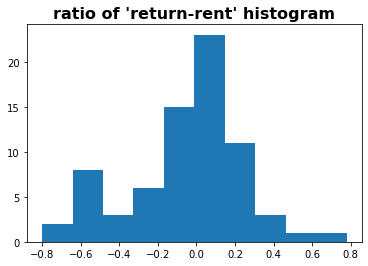

In [71]:
plt.hist(중구대여반납_거치대['(반납-대여)/거치대수'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title("ratio of 'return-rent' histogram", fontdict=title_font)

# 대여소별 자전거수 적정/많음/적음으로 분류
#### (반납-대여)/거치대수가 [-0.16888889, 0.14666667]인 값 : 적정
#### (반납-대여)/거치대수가 [0.14666667, ]인 값 : 많음
#### (반납-대여)/거치대수가 [, -0.16888889]인 값 : 적음

In [72]:
def get_group(v):
    if v <=  -0.16888889:
        group = '적음'
    elif v >= 0.14666667:
        group = '많음'
    else:
        group = '적정'
    return group

In [73]:
중구대여반납_거치대['group'] = 중구대여반납_거치대['(반납-대여)/거치대수'].apply(lambda v: get_group(v))

In [74]:
중구대여반납_거치대.to_csv("./중구대여반납_거치대_group24_17_21.csv",index_label=False,encoding='utf-8')

In [75]:
df=pd.read_csv("./중구대여반납_거치대_group24_17_21.csv")

In [76]:
len(중구대여반납_거치대[중구대여반납_거치대['group']=='적정'])

38

In [77]:
len(중구대여반납_거치대[중구대여반납_거치대['group'] == '많음'])

16

In [78]:
len(중구대여반납_거치대[중구대여반납_거치대['group'] == '적음'])

19

In [79]:
m = folium.Map([위도, 경도], tiles='cartodbpositron',zoom_start = 14)

In [80]:
coords = []
for i in range(len(df)):
    x = df['위도'][i]
    y = df['경도'][i]
    coords.append([x, y])

for i in range(len(df)):  # len함수로 전체 대여소 갯수 파악, for문을 통해 반복 수행 
    station_id=df['대여소번호'][i]  # 마우스 올렸을 때 id 표시를 위해서 id값 추출 
    max_bc_count=float(abs(df['(반납-대여)/거치대수'][i]))*30  # 거치대 수를 max_bc_count 변수 지정 
    if df['group'][i] == '적음' :  # if문을 활용하여 station type 색 지정,
        station_color='red'
    elif df['group'][i] == '많음' : 
        station_color='blue'
    else :station_color='green'    
    folium.Circle(location=coords[i],radius=max_bc_count,color=station_color,fill=True,fill_opacity=1,tooltip=station_id,popup=max_bc_count).add_to(m)
   
m